In [6]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [10]:
# define state
class BMIstate(TypedDict):

    weight:float
    height:float
    bmi:float

    category:str

In [5]:
def bmi_calculator(state:BMIstate)->BMIstate:

    weight=state['weight']
    height=state['height']

    bmi=weight/(height**2)

    state['bmi']=round(bmi,2)

    return state


In [11]:
def categorize(state:BMIstate)->BMIstate:

    bmi=state['bmi']

    if bmi<18.5:
        state['category']='Underweight'
    elif 18.5<=bmi<24.9:
        state['category']='Normal weight'
    elif 25<=bmi<29.9:
        state['category']='Overweight'
    else:
        state['category']='Obesity'

    return state

In [12]:
# define Graph
graph=StateGraph(BMIstate)

# add nodes
graph.add_node("get_bmi",bmi_calculator)
graph.add_node("categorize_bmi",categorize)

# add edges
graph.add_edge(START,"get_bmi")
graph.add_edge("get_bmi","categorize_bmi")
graph.add_edge("categorize_bmi",END)

# compile graph
workflow=graph.compile()




In [13]:
info={"weight":70,
      "height":1.75}

workflow.invoke(info)

{'weight': 70, 'height': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}

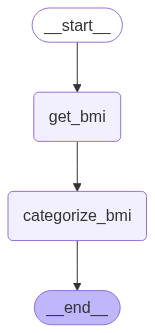

In [14]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass